# Exploratory Data Analysis
### Dataset : IT Salary in UE (European Union)

#### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 50)

#### Read dataset

In [3]:
df18 = pd.read_csv('IT Salary Survey EU 2018.csv')
df19 = pd.read_csv('IT Salary Survey EU 2019.csv')
df20 = pd.read_csv('IT Salary Survey EU 2020.csv')

#### Explore 3 datasets provided in the link

In [4]:
df18.shape, df19.shape, df20.shape

((765, 14), (991, 23), (1253, 23))

In [5]:
df18.columns, df19.columns, df20.columns

(Index(['Timestamp', 'Age', 'Gender', 'City', 'Position', 'Years of experience',
        'Your level', 'Current Salary', 'Salary one year ago',
        'Salary two years ago', 'Are you getting any Stock Options?',
        'Main language at work', 'Company size', 'Company type'],
       dtype='object'),
 Index(['Zeitstempel', 'Age', 'Gender', 'City', 'Seniority level',
        'Position (without seniority)', 'Years of experience',
        'Your main technology / programming language',
        'Yearly brutto salary (without bonus and stocks)', 'Yearly bonus',
        'Yearly stocks',
        'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
        'Yearly bonus one year ago. Only answer if staying in same country',
        'Yearly stocks one year ago. Only answer if staying in same country',
        'Number of vacation days', 'Number of home office days per month',
        'Main language at work', 'Company name ', 'Company size',
   

- Since the datasets have different columns from each other, I will not concatenate them.
- But, I will choose one of them

In [6]:
# check missing values

In [7]:
miss18 = df18[df18.columns].isnull().sum()*100/df18.shape[0]
miss18.sort_values(ascending=False)

Salary two years ago                  39.477124
Salary one year ago                   22.091503
Age                                   12.156863
Company type                           4.575163
Years of experience                    4.313725
City                                   3.790850
Position                               3.660131
Are you getting any Stock Options?     3.006536
Your level                             2.875817
Current Salary                         1.960784
Main language at work                  1.960784
Company size                           1.960784
Gender                                 1.830065
Timestamp                              0.000000
dtype: float64

In [8]:
miss19 = df19[df19.columns].isnull().sum()*100/df19.shape[0]
miss19.sort_values(ascending=False)

0                                                                                                       100.000000
Yearly stocks one year ago. Only answer if staying in same country                                       85.973764
Yearly stocks                                                                                            79.515641
Company name                                                                                             74.167508
Yearly bonus one year ago. Only answer if staying in same country                                        74.066599
Yearly bonus                                                                                             46.518668
Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country     39.152371
Number of home office days per month                                                                     35.519677
Company business sector                                                         

In [9]:
miss20 = df20[df20.columns].isnull().sum()*100/df20.shape[0]
miss20.sort_values(ascending=False)

Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week                          70.231445
Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR    63.128492
Annual bonus+stocks one year ago. Only answer if staying in same country                                                   50.997606
Yearly bonus + stocks in EUR                                                                                               33.838787
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country                   29.369513
Other technologies/programming languages you use often                                                                     12.529928
Your main technology / programming language                                                                                10.135674
Number of vacation days                                              

#### Choose dataset
- Since, the main idea of these dataset is Salary
- So, by comparing each other, I decide to use Dataset in 2020, because there is no missing values
on Yearly brutto salary (without bonus and stocks).

#### Deeper exploration dataset in 2020

In [10]:
# remove unnecessary features
data = df20.drop(['Timestamp', 'Years of experience in Germany', 
                  'Your main technology / programming language', 
                  'Other technologies/programming languages you use often',
                  'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
                  'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'
                 ], axis=1)
data.head()

,Age,Gender,City,Position,Total years of experience,Seniority level,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?
0,26.0,Male,Munich,Software Engineer,5,Senior,80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No
1,26.0,Male,Berlin,Backend Developer,7,Senior,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No
2,29.0,Male,Berlin,Software Engineer,12,Lead,120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
3,28.0,Male,Berlin,Frontend Developer,4,Junior,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No
4,37.0,Male,Berlin,Backend Developer,17,Senior,62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No


In [11]:
data.duplicated().sum()

16

In [12]:
# remove duplicates
data = data.drop_duplicates()

In [13]:
# simplify columns name
newname = ['Age','Gender','City','Position','Total Years of Experience','Seniority Level',
           'Yearly Brutto Salary in EUR','Yearly Bonus+Stocks in EUR',
           'Last Year Annual Brutto Salary in EUR','Last Year Annual Bonus+Stocks in EUR','Vacation Days',
           'Employment Status','Contract Duration','Main Language at Work','Company Size',
           'Company Type', 'Lost Job due to Covid19']
data.columns = newname
data

,Age,Gender,City,Position,Total Years of Experience,Seniority Level,Yearly Brutto Salary in EUR,Yearly Bonus+Stocks in EUR,Last Year Annual Brutto Salary in EUR,Last Year Annual Bonus+Stocks in EUR,Vacation Days,Employment Status,Contract Duration,Main Language at Work,Company Size,Company Type,Lost Job due to Covid19
0,26.0,Male,Munich,Software Engineer,5,Senior,80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No
1,26.0,Male,Berlin,Backend Developer,7,Senior,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No
2,29.0,Male,Berlin,Software Engineer,12,Lead,120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
3,28.0,Male,Berlin,Frontend Developer,4,Junior,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No
4,37.0,Male,Berlin,Backend Developer,17,Senior,62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,31.0,Male,Berlin,Backend Developer,9,Senior,70000.0,72000,70000.0,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes
1249,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,Senior,60000.0,3000,48000.0,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No
1250,39.0,Male,Munich,IT Operations Manager,15,Lead,110000.0,0,90000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No
1251,26.0,Male,Saarbrücken,Frontend Developer,7,Middle,38350.0,40950,33800.0,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No


In [14]:
# handle missing values
miss = data[data.columns].isnull().sum()*100/data.shape[0]
miss.sort_values(ascending=False)

Last Year Annual Bonus+Stocks in EUR     50.363783
Yearly Bonus+Stocks in EUR               33.548909
Last Year Annual Brutto Salary in EUR    29.021827
Vacation Days                             5.335489
Contract Duration                         2.344382
Age                                       2.182700
Company Type                              2.021019
Lost Job due to Covid19                   1.616815
Company Size                              1.455133
Employment Status                         1.374293
Total Years of Experience                 1.293452
Main Language at Work                     1.293452
Seniority Level                           0.970089
Gender                                    0.808407
Position                                  0.485044
Yearly Brutto Salary in EUR               0.000000
City                                      0.000000
dtype: float64

In [15]:
salary = ['Yearly Bonus+Stocks in EUR','Last Year Annual Bonus+Stocks in EUR',
          'Last Year Annual Brutto Salary in EUR']
# assume that null values mean there is no salary at the time
data[salary]=data[salary].fillna(0)

In [16]:
miss = data[data.columns].isnull().sum()*100/data.shape[0]
miss.sort_values(ascending=False)

Vacation Days                            5.335489
Contract Duration                        2.344382
Age                                      2.182700
Company Type                             2.021019
Lost Job due to Covid19                  1.616815
Company Size                             1.455133
Employment Status                        1.374293
Total Years of Experience                1.293452
Main Language at Work                    1.293452
Seniority Level                          0.970089
Gender                                   0.808407
Position                                 0.485044
Yearly Brutto Salary in EUR              0.000000
Yearly Bonus+Stocks in EUR               0.000000
Last Year Annual Bonus+Stocks in EUR     0.000000
City                                     0.000000
Last Year Annual Brutto Salary in EUR    0.000000
dtype: float64

In [17]:
cat = data[miss[miss>0].index].select_dtypes(include=['object']).columns
num = data[miss[miss>0].index].select_dtypes(include=['float64','int64']).columns

In [18]:
data[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1210.0,32.484298,5.64721,20.0,29.0,32.0,35.0,69.0


In [19]:
data[cat].describe().T

,count,unique,top,freq
Gender,1227,3,Male,1035
Position,1231,148,Software Engineer,380
Total Years of Experience,1221,48,10,138
Seniority Level,1225,24,Senior,560
Vacation Days,1171,45,30,478
Employment Status,1220,11,Full-time employee,1174
Contract Duration,1208,3,Unlimited contract,1144
Main Language at Work,1221,14,English,1006
Company Size,1219,5,1000+,441
Company Type,1212,63,Product,746


In [20]:
# imputation using median and mode of the data
for col in num:
    data[col] = data[col].fillna(data[col].median())
for col in cat:
    data[col] = data[col].fillna(data[col].mode()[0])
    
data[data.columns].isnull().sum()

Age                                      0
Gender                                   0
City                                     0
Position                                 0
Total Years of Experience                0
Seniority Level                          0
Yearly Brutto Salary in EUR              0
Yearly Bonus+Stocks in EUR               0
Last Year Annual Brutto Salary in EUR    0
Last Year Annual Bonus+Stocks in EUR     0
Vacation Days                            0
Employment Status                        0
Contract Duration                        0
Main Language at Work                    0
Company Size                             0
Company Type                             0
Lost Job due to Covid19                  0
dtype: int64

In [21]:
data.head()

,Age,Gender,City,Position,Total Years of Experience,Seniority Level,Yearly Brutto Salary in EUR,Yearly Bonus+Stocks in EUR,Last Year Annual Brutto Salary in EUR,Last Year Annual Bonus+Stocks in EUR,Vacation Days,Employment Status,Contract Duration,Main Language at Work,Company Size,Company Type,Lost Job due to Covid19
0,26.0,Male,Munich,Software Engineer,5,Senior,80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No
1,26.0,Male,Berlin,Backend Developer,7,Senior,80000.0,0,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No
2,29.0,Male,Berlin,Software Engineer,12,Lead,120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
3,28.0,Male,Berlin,Frontend Developer,4,Junior,54000.0,0,0.0,0,24,Full-time employee,Unlimited contract,English,51-100,Startup,No
4,37.0,Male,Berlin,Backend Developer,17,Senior,62000.0,0,62000.0,0,29,Full-time employee,Unlimited contract,English,101-1000,Product,No


In [22]:
data[data.select_dtypes(include=['object']).columns].nunique()

Gender                                    3
City                                    119
Position                                148
Total Years of Experience                48
Seniority Level                          24
Yearly Bonus+Stocks in EUR              169
Last Year Annual Bonus+Stocks in EUR    132
Vacation Days                            45
Employment Status                        11
Contract Duration                         3
Main Language at Work                    14
Company Size                              5
Company Type                             63
Lost Job due to Covid19                  10
dtype: int64

In [23]:
# fix the datatype

In [24]:
wrongdtype = ['Total Years of Experience','Yearly Bonus+Stocks in EUR',
              'Last Year Annual Bonus+Stocks in EUR','Vacation Days',
              'Company Size','Lost Job due to Covid19']
for col in wrongdtype:
    print(col, '\n', data[col].unique())
    print()

Total Years of Experience 
 ['5' '7' '12' '4' '17' '6' '8' '15' '2' '25' '10' '14' '11' '18' '13' '30'
 '3' '40' '26' '23' '9' '19' '20' '5.5' '22' '16' '0.8' '1' '1.5' '6.5'
 '21' '7.5' '2.5' '28' '29' '1,5' '24' '0' '4.5' '27'
 '1 (as QA Engineer) / 11 in total' '2,5' '15, thereof 8 as CTO' '31'
 '6 (not as a data scientist, but as a lab scientist)' '383' '3.5'
 'less than year']

Yearly Bonus+Stocks in EUR 
 ['5000' 0 '120000' '101' '40000' '9400' '2000' '80000' '4000' '10000'
 '1000' '7000' '12000' '1500' '35200' '15000' '8000' '72000' '30000'
 '75000' '73000' '3000' '5800' '56000' '6300' '6000' '20000' '62000'
 '22000' '7500' '67000' '7750' '8500' '70000' '17800' '25000' '26000'
 '10300' '6900' '95000' '4700' '18000' '140000' '22500' '112000' '7300'
 '77000' '17000' '32000' '12150' '60000' '200000' '3500' '0' '500' '63500'
 '20240' '81200' '11000' '6500' '46000' '400' '122.13' '5600' '4500'
 '5400' '14500' '43500' '50400' '800' '88000' '28800' '65000' '86000'
 '77400' '12' '74000'

In [25]:
data['Total Years of Experience'].replace('1 (as QA Engineer) / 11 in total', 11, inplace=True)
data['Total Years of Experience'].replace('1,5', 1.5, inplace=True)
data['Total Years of Experience'].replace('2,5', 2.5, inplace=True)
data['Total Years of Experience'].replace('15, thereof 8 as CTO', 15, inplace=True)
data['Total Years of Experience'].replace('6 (not as a data scientist, but as a lab scientist)', 6, inplace=True)
data['Total Years of Experience'].replace('383', 38, inplace=True)
data['Total Years of Experience'].replace('less than year', 0.5, inplace=True)

In [26]:
data['Yearly Bonus+Stocks in EUR'].replace(['bvg only','depends','Na','Not sure','-'], 0, inplace=True)
data['Yearly Bonus+Stocks in EUR'].replace('15000+-', 15000, inplace=True)
data['Yearly Bonus+Stocks in EUR'].replace('5000000000', 50000, inplace=True)
data['Yearly Bonus+Stocks in EUR'].replace('60847.32', 60847, inplace=True)

In [27]:
data['Last Year Annual Bonus+Stocks in EUR'].replace(['learning budget, bvg, gym, food','-'], 0, inplace=True)
data['Yearly Bonus+Stocks in EUR'].replace('50000000', 50000, inplace=True)

In [28]:
data['Vacation Days'].replace(['unlimited','unlimited ',
                               '(no idea)','30 in contract (but theoretically unlimited)',
                               'Unlimited','Unlimited '], 365, inplace=True)
data['Vacation Days'].replace('~25', 25, inplace=True)
data['Vacation Days'].replace('23+', 23, inplace=True)
data['Vacation Days'].replace('24 labour days', 24, inplace=True)
data['Vacation Days'].replace('37.5', 38, inplace=True)

In [29]:
data['Company Size'].replace('up to 10', 'Micro', inplace=True)
data['Company Size'].replace('11-50', 'Small', inplace=True)
data['Company Size'].replace('51-100', 'Medium', inplace=True)
data['Company Size'].replace(['101-1000','1000+'], 'Large', inplace=True)

In [30]:
data['Lost Job due to Covid19'].replace(["i didn't but will be looking for new one because of covid",
 'kurzarbeitzeit for 1.5 months',
 'Have been a freelancer at the beginning of year',
 'No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months',
 'Lost the job but for different reason',
 'Leads and project inquiries have slowed down'], 'No', inplace=True)
data['Lost Job due to Covid19'].replace(['Laid off for a bit',
 'yes but found a new one with better pay / perks'], 'Yes', inplace=True)

In [31]:
changedtype = ['Total Years of Experience','Yearly Bonus+Stocks in EUR',
              'Last Year Annual Bonus+Stocks in EUR','Vacation Days']
data[changedtype] = data[changedtype].apply(pd.to_numeric)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1237 entries, 0 to 1252
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    1237 non-null   float64
 1   Gender                                 1237 non-null   object 
 2   City                                   1237 non-null   object 
 3   Position                               1237 non-null   object 
 4   Total Years of Experience              1237 non-null   float64
 5   Seniority Level                        1237 non-null   object 
 6   Yearly Brutto Salary in EUR            1237 non-null   float64
 7   Yearly Bonus+Stocks in EUR             1237 non-null   float64
 8   Last Year Annual Brutto Salary in EUR  1237 non-null   float64
 9   Last Year Annual Bonus+Stocks in EUR   1237 non-null   int64  
 10  Vacation Days                          1237 non-null   int64  
 11  Employmen

In [33]:
for col in data.select_dtypes(include=['object']).columns:
    if data[col].nunique() < 5:
        print(data[col].value_counts(normalize=True))
    else:
        print(col, '--->', data[col].nunique())
        
    print()

Gender
Male       0.844786
Female     0.153597
Diverse    0.001617
Name: proportion, dtype: float64

City ---> 119

Position ---> 148

Seniority Level ---> 24

Employment Status ---> 11

Contract Duration
Unlimited contract    0.948262
Temporary contract    0.050930
0                     0.000808
Name: proportion, dtype: float64

Main Language at Work ---> 14

Company Size
Large     0.693614
Small     0.139854
Medium    0.117219
Micro     0.049313
Name: proportion, dtype: float64

Company Type ---> 63

Lost Job due to Covid19
No     0.94907
Yes    0.05093
Name: proportion, dtype: float64



In [34]:
# make some visualization

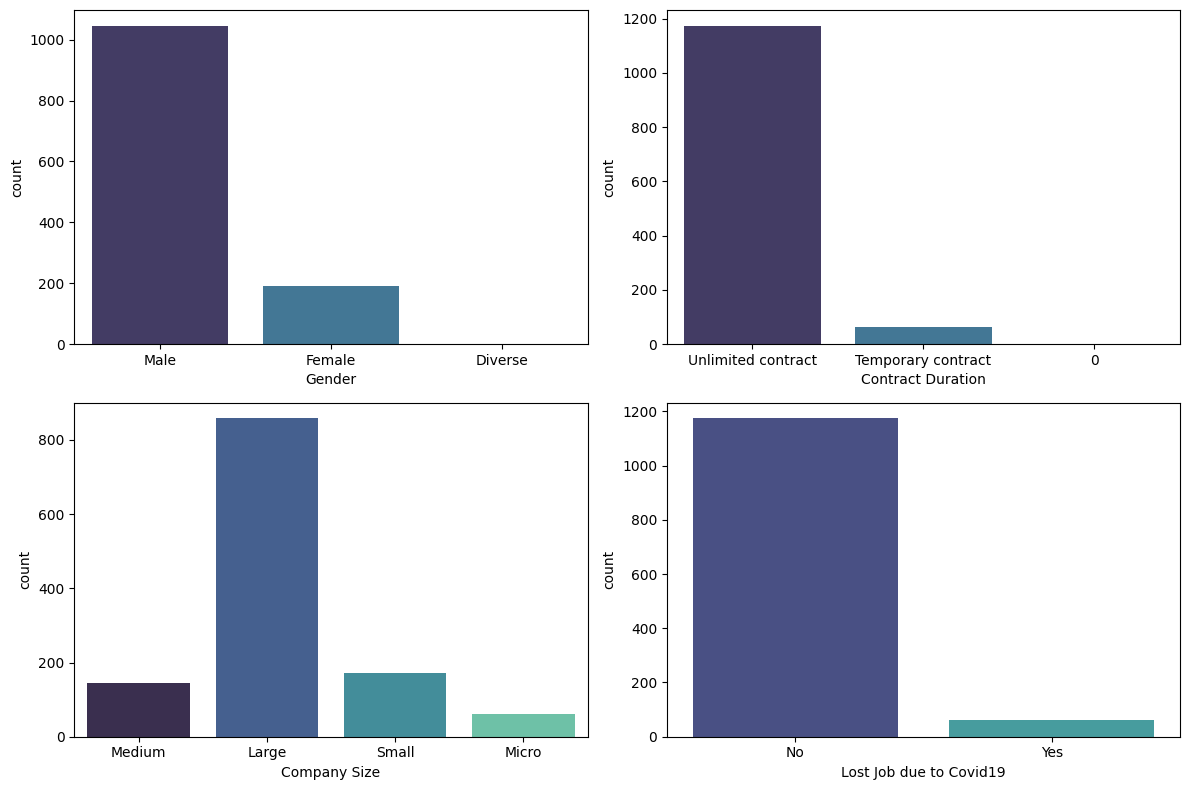

In [35]:
fig, axs = plt.subplots(2,2, figsize=(12,8))
sns.countplot(x=data['Gender'], palette='mako', ax=axs[0,0])
sns.countplot(x=data['Contract Duration'], palette='mako', ax=axs[0,1])
sns.countplot(x=data['Company Size'], palette='mako', ax=axs[1,0])
sns.countplot(x=data['Lost Job due to Covid19'], palette='mako', ax=axs[1,1])

plt.tight_layout()
plt.show()

In [36]:
# fix data in Gender and Contract Duration
data['Gender'].replace('Diverse', 'Female', inplace=True)
data['Contract Duration'].replace('0', 'Temporary contract', inplace=True)

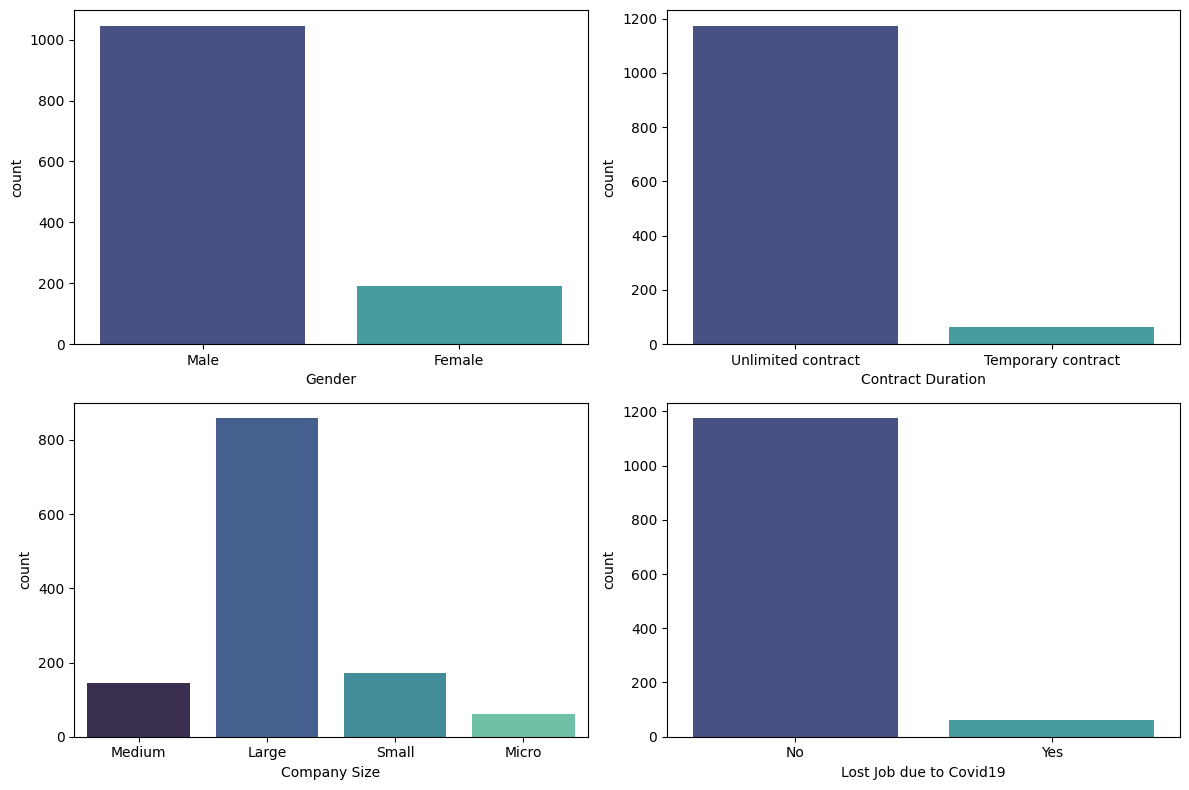

In [37]:
fig, axs = plt.subplots(2,2, figsize=(12,8))
sns.countplot(x=data['Gender'], palette='mako', ax=axs[0,0])
sns.countplot(x=data['Contract Duration'], palette='mako', ax=axs[0,1])
sns.countplot(x=data['Company Size'], palette='mako', ax=axs[1,0])
sns.countplot(x=data['Lost Job due to Covid19'], palette='mako', ax=axs[1,1])

plt.tight_layout()
plt.show()

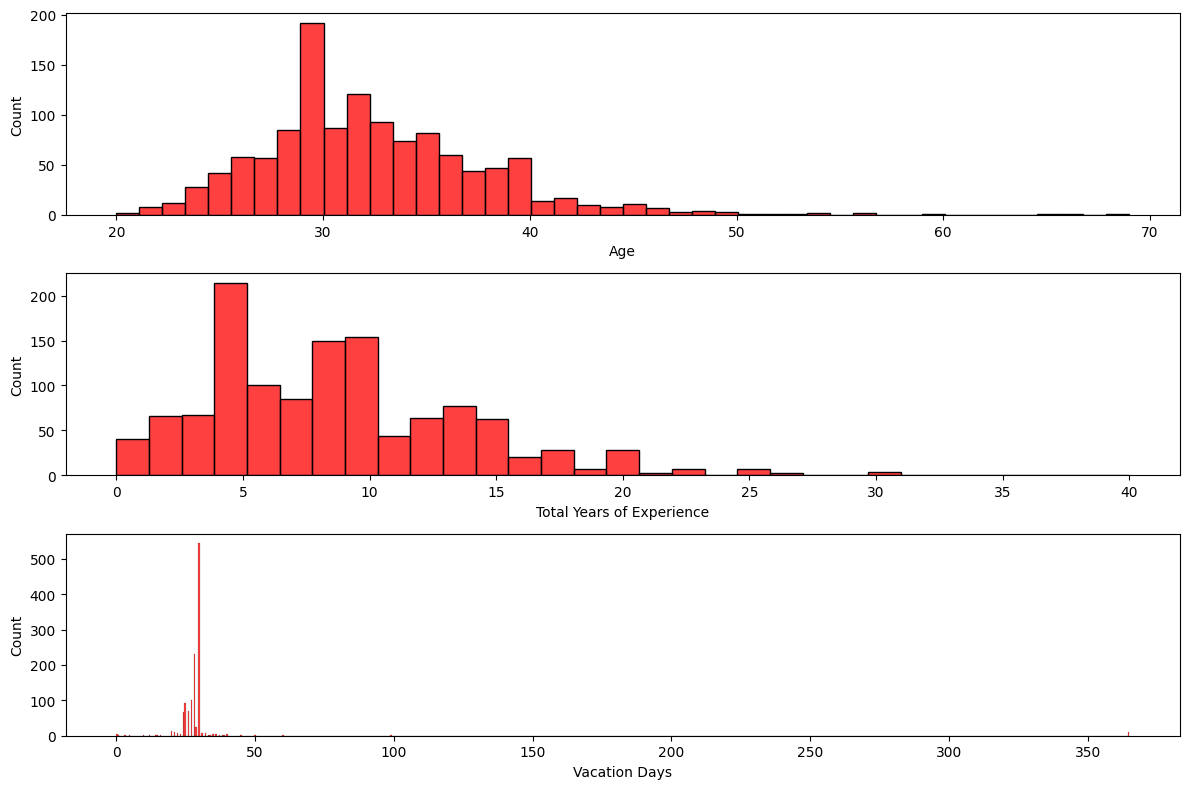

In [38]:
fig, axs = plt.subplots(3, figsize=(12,8))
sns.histplot(x=data['Age'], color='r', ax=axs[0])
sns.histplot(x=data['Total Years of Experience'], color='r', ax=axs[1])
sns.histplot(x=data['Vacation Days'], color='r', ax=axs[2])

plt.tight_layout()
plt.show()

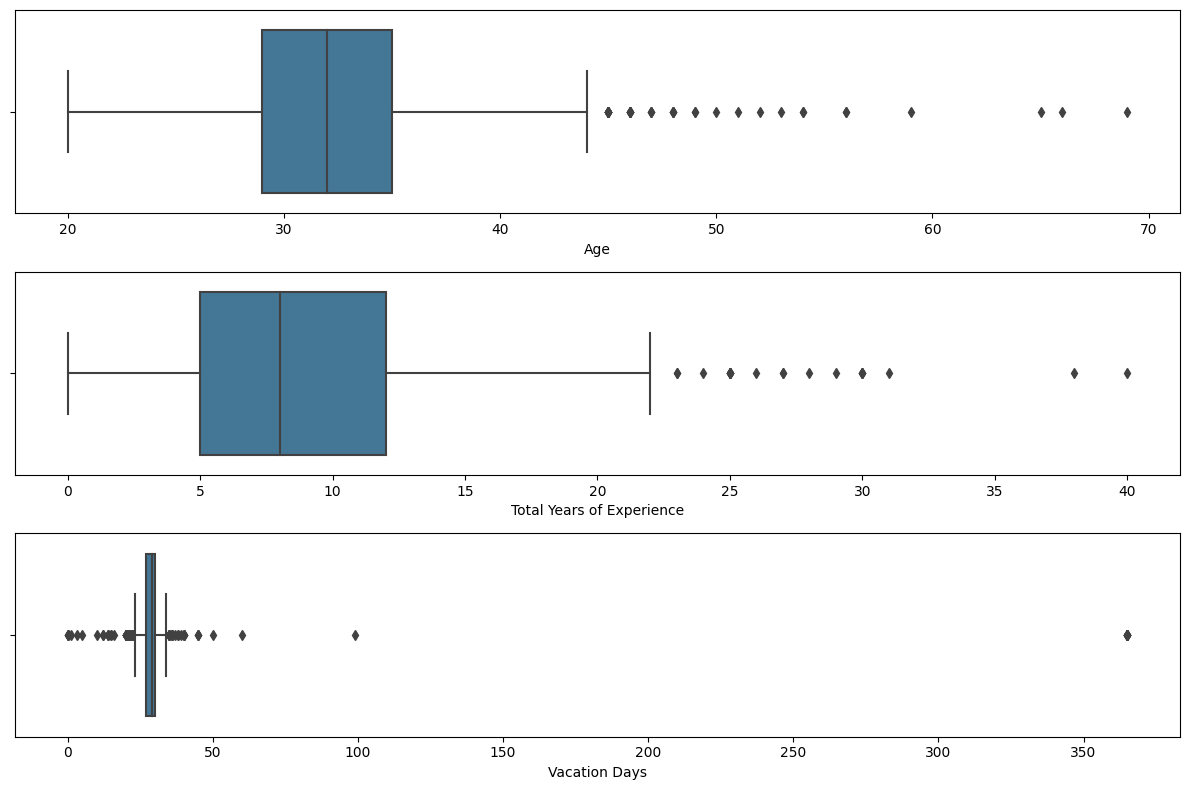

In [39]:
fig, axs = plt.subplots(3, figsize=(12,8))
sns.boxplot(x=data['Age'], palette='mako', ax=axs[0])
sns.boxplot(x=data['Total Years of Experience'], palette='mako', ax=axs[1])
sns.boxplot(x=data['Vacation Days'], palette='mako', ax=axs[2])

plt.tight_layout()
plt.show()

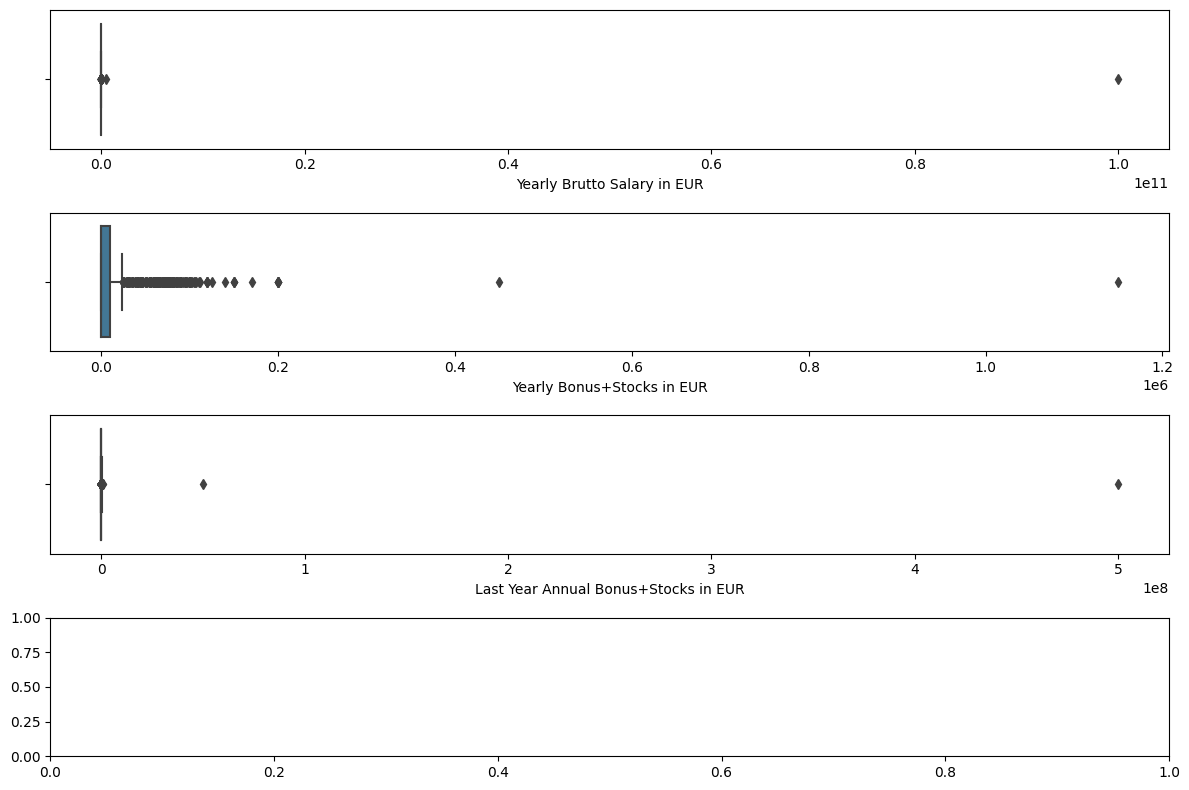

In [40]:
fig, axs = plt.subplots(4, figsize=(12,8))
sns.boxplot(x=data['Yearly Brutto Salary in EUR'], palette='mako', ax=axs[0])
sns.boxplot(x=data['Yearly Bonus+Stocks in EUR'], palette='mako', ax=axs[1])
sns.boxplot(x=data['Last Year Annual Brutto Salary in EUR'], palette='mako', ax=axs[2])
sns.boxplot(x=data['Last Year Annual Bonus+Stocks in EUR'], palette='mako', ax=axs[2])

plt.tight_layout()
plt.show()

In [41]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1237.0,3.247373e+01,5.585638e+00,20.0,29.0,32.0,35.0,6.900000e+01
Total Years of Experience,1237.0,8.791512e+00,5.325487e+00,0.0,5.0,8.0,12.0,4.000000e+01
Yearly Brutto Salary in EUR,1237.0,8.131650e+07,2.843273e+09,10001.0,58800.0,70000.0,80000.0,1.000000e+11
Yearly Bonus+Stocks in EUR,1237.0,1.424851e+04,4.472498e+04,0.0,0.0,0.0,9450.0,1.150000e+06
Last Year Annual Brutto Salary in EUR,1237.0,4.519787e+05,1.421495e+07,0.0,0.0,57600.0,72000.0,5.000000e+08
Last Year Annual Bonus+Stocks in EUR,1237.0,5.105536e+04,1.421558e+06,0.0,0.0,0.0,5000.0,5.000000e+07
Vacation Days,1237.0,3.113985e+01,3.192171e+01,0.0,27.0,29.0,30.0,3.650000e+02


In [42]:
q1, q3 = np.percentile(data['Yearly Brutto Salary in EUR'], [25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 - (1.5*iqr)

In [43]:
lower_fence, upper_fence

(27000.0, 48200.0)

In [44]:
data[data['Yearly Brutto Salary in EUR']>upper_fence]

,Age,Gender,City,Position,Total Years of Experience,Seniority Level,Yearly Brutto Salary in EUR,Yearly Bonus+Stocks in EUR,Last Year Annual Brutto Salary in EUR,Last Year Annual Bonus+Stocks in EUR,Vacation Days,Employment Status,Contract Duration,Main Language at Work,Company Size,Company Type,Lost Job due to Covid19
0,26.0,Male,Munich,Software Engineer,5.0,Senior,80000.0,5000.0,75000.0,10000,30,Full-time employee,Unlimited contract,English,Medium,Product,No
1,26.0,Male,Berlin,Backend Developer,7.0,Senior,80000.0,0.0,82000.0,5000,28,Full-time employee,Unlimited contract,English,Large,Product,No
2,29.0,Male,Berlin,Software Engineer,12.0,Lead,120000.0,120000.0,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,Large,Product,Yes
3,28.0,Male,Berlin,Frontend Developer,4.0,Junior,54000.0,0.0,0.0,0,24,Full-time employee,Unlimited contract,English,Medium,Startup,No
4,37.0,Male,Berlin,Backend Developer,17.0,Senior,62000.0,0.0,62000.0,0,29,Full-time employee,Unlimited contract,English,Large,Product,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,34.0,Male,Zurich,Software Engineer,7.0,Senior,108500.0,0.0,90000.0,0,25,Full-time employee,Unlimited contract,English,Small,Startup,No
1248,31.0,Male,Berlin,Backend Developer,9.0,Senior,70000.0,72000.0,70000.0,72000,26,Full-time employee,Unlimited contract,English,Medium,Product,Yes
1249,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10.0,Senior,60000.0,3000.0,48000.0,2500,365,Full-time employee,Unlimited contract,English,Large,Product,No
1250,39.0,Male,Munich,IT Operations Manager,15.0,Lead,110000.0,0.0,90000.0,0,28,Full-time employee,Unlimited contract,English,Large,eCommerce,No


In [45]:
data.to_csv('IT Salary Survey EU 2020_transformed.csv', index=False)